In [1]:
###################################################################
## Import Python Libraries
###################################################################
import os
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
###################################################################
## Set the path for a working Directory.
## You need to change this to your own directory path
###################################################################
workingdir = 'C:/Users/dgard/Dropbox/MBA/Clases/Textual analysis in business/Final project'
try:
    os.mkdir(workingdir)
except:
    pass

os.chdir(workingdir)
print(os.getcwd())

C:\Users\dgard\Dropbox\MBA\Clases\Textual analysis in business\Final project


In [3]:
###################################################################
## Read 'Boulder_Clean.csv' data  under the working directory.
## Check the characteristics of the data.
###################################################################
bouldercounty = pd.read_csv('Boulder_Clean.csv')

#create total square feet (above ground + finished basement + unfinished basement)
bouldercounty['TOTAL_SQFT'] = bouldercounty['ABOVE_GROUND_SQFT']+bouldercounty['FINISHED_BSMT_SQFT']+bouldercounty['UNFINISHED_BSMT_SQFT']+bouldercounty['STUDIO_SQFT']


print(type(bouldercounty))
print(bouldercounty.info())
print(bouldercounty.head(20))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5490 non-null   int64  
 1   MARKET_AREA           5490 non-null   int64  
 2   PROPERTY_ADDRESS      5490 non-null   object 
 3   LOCCITY               5490 non-null   object 
 4   SUBNAME               5490 non-null   object 
 5   BLDG1_DESIGN          5490 non-null   object 
 6   BLDG1_YEAR_BUILT      5490 non-null   int64  
 7   BEDROOMS              5490 non-null   int64  
 8   FULL_BATHS            5490 non-null   int64  
 9   THREE_QTR_BATHS       5490 non-null   int64  
 10  HALF_BATHS            5490 non-null   int64  
 11  ABOVE_GROUND_SQFT     5490 non-null   float64
 12  FINISHED_BSMT_SQFT    5490 non-null   float64
 13  UNFINISHED_BSMT_SQFT  5490 non-null   float64
 14  GARAGE_SQFT           5490 non-nul

In [4]:
###################################################################
## Read 'Jeffco.xlsx' data  under the working directory.
## Check the characteristics of the data.
###################################################################
jeffco = pd.read_excel('Jeffco.xlsx')

print(jeffco.info())
print(jeffco.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PIN                        3510 non-null   int64  
 1   Property Address           3510 non-null   object 
 2   Property Type              3510 non-null   object 
 3   Design                     3510 non-null   object 
 4   Year Blt                   3376 non-null   float64
 5   Gross Area                 3510 non-null   int64  
 6   #Acres                     3510 non-null   float64
 7   Sale Date                  3510 non-null   object 
 8   Sale Amount                3510 non-null   int64  
 9   Sale Type                  3510 non-null   object 
 10  Reason                     3510 non-null   object 
 11  City                       3510 non-null   object 
 12  Postal Code                3510 non-null   int64  
 13  Subdivision                3510 non-null   objec

In [5]:
jeffco = jeffco.rename(columns={'Property Address': 'PROPERTY_ADDRESS', 'Sale Amount': 'SALE_PRICE', 'County': 'COUNTY', 'Gross Area': 'TOTAL_SQFT'})

print(jeffco.info())
print(jeffco.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PIN                        3510 non-null   int64  
 1   PROPERTY_ADDRESS           3510 non-null   object 
 2   Property Type              3510 non-null   object 
 3   Design                     3510 non-null   object 
 4   Year Blt                   3376 non-null   float64
 5   TOTAL_SQFT                 3510 non-null   int64  
 6   #Acres                     3510 non-null   float64
 7   Sale Date                  3510 non-null   object 
 8   SALE_PRICE                 3510 non-null   int64  
 9   Sale Type                  3510 non-null   object 
 10  Reason                     3510 non-null   object 
 11  City                       3510 non-null   object 
 12  Postal Code                3510 non-null   int64  
 13  Subdivision                3510 non-null   objec

In [6]:
# concatenate the dataframes vertically
bandj = pd.concat([bouldercounty, jeffco])

# display the result
print(bandj)

#bandj.to_csv('bandj.csv', index=False)

      Unnamed: 0  MARKET_AREA      PROPERTY_ADDRESS         LOCCITY  \
0            0.0        201.0   2637 RIVERSIDE DR    UNINCORPORATED   
1            1.0        105.0       935 MORGAN DR           BOULDER   
2            2.0        105.0   5584 STONEWALL PL           BOULDER   
3            3.0        303.0  10350 MACEDONIA ST    UNINCORPORATED   
4            4.0        401.0  7146 PETURSDALE CT    UNINCORPORATED   
...          ...          ...                   ...             ...   
3505         NaN          NaN          3350  OAK ST             NaN   
3506         NaN          NaN       2822  TELLER ST             NaN   
3507         NaN          NaN        8855 W 32ND PL             NaN   
3508         NaN          NaN        4020  ESTES ST             NaN   
3509         NaN          NaN        3885  URBAN ST             NaN   

                                  SUBNAME     BLDG1_DESIGN  BLDG1_YEAR_BUILT  \
0                     HEATHERMEADE 4 - MT  1 Story - Ranch         

In [7]:
#create suffix list


Suffix = ['AL','ALY', 'ANX', 'ARC', 'AVE', 'BYU', 'BCH', 'BND', 'BLF', 'BLFS', 'BTM', 'BLVD', 'BR', 'BRG', 'BRK', 'BRKS', 'BG', 'BGS', 'BYP', 'CP', 'CYN', 'CPE', 'CSWY', 'CTR', 'CTRS', 'CIR', 'CIRS', 'CLF', 'CLFS', 'CLB', 'CMN', 'CMNS', 'COR', 'CORS', 'CRSE', 'CT', 'CTS', 'CV', 'CVS', 'CRK', 'CRES', 'CRST', 'XING', 'XRD', 'XRDS', 'CURV', 'DL', 'DM', 'DV', 'DR', 'DRS', 'EST', 'ESTS', 'EXPY', 'EXT', 'EXTS', 'FALL', 'FLS', 'FRY', 'FLD', 'FLDS', 'FLT', 'FLTS', 'FRD', 'FRDS', 'FRST', 'FRG', 'FRGS', 'FRK', 'FRKS', 'FT', 'FWY', 'GDN', 'GDNS', 'GTWY', 'GLN', 'GLNS', 'GRN', 'GRNS', 'GRV', 'GRVS', 'HBR', 'HBRS', 'HVN', 'HTS', 'HWY', 'HL', 'HLS', 'HOLW', 'INLT', 'IS', 'ISS', 'ISLE', 'JCT', 'JCTS', 'KY', 'KYS', 'KNL', 'KNLS', 'LK', 'LKS', 'LAND', 'LNDG', 'LN', 'LGT', 'LGTS', 'LF', 'LCK', 'LCKS', 'LDG', 'LOOP', 'MALL', 'MNR', 'MNRS', 'MDW', 'MDWS', 'MEWS', 'ML', 'MLS', 'MSN', 'MTWY', 'MT', 'MTN', 'MTNS', 'NCK', 'ORCH', 'OVAL', 'OPAS', 'PARK', 'PKWY', 'PASS', 'PSGE', 'PATH', 'PIKE', 'PNE', 'PNES', 'PL', 'PLACE', 'PLN', 'PLNS', 'PLZ', 'PT', 'PTS', 'PRT', 'PRTS', 'PR', 'RADL', 'RAMP', 'RNCH', 'RPD', 'RPDS', 'RST', 'RDG', 'RDGS', 'RIV', 'RD', 'RDS', 'RTE', 'ROW', 'RUE', 'RUN', 'SHL', 'SHLS', 'SHR', 'SHRS', 'SKWY', 'SPG', 'SPGS', 'SPUR', 'SQ', 'SQS', 'STA', 'STRA', 'STRM', 'ST', 'STS', 'SMT', 'TER', 'TRWY', 'TRCE', 'TRAK', 'TRFY', 'TRL', 'TRLR', 'TUNL', 'TPKE', 'UPAS', 'UN', 'UNS', 'VLY', 'VLYS', 'VIA', 'VW', 'VWS', 'VLG', 'VLGS', 'VL', 'VIS', 'WALK', 'WALL', 'WAY', 'WAYS', 'WL', 'WLS']
count = len(Suffix)
print(count)

204


In [8]:
#pattern for address
pattern = r'\d+\s+(.*?)\s+?\b((?:' + '|'.join(Suffix) + r')\b)'
pattern2 = r'\b\d+\s+(BROADWAY)\s+\d+\b'

#we do have problems with streets without any suffix

# Create new columns for address number, name, and suffix
bandj['ADDRESS_NUMBER'] = bandj['PROPERTY_ADDRESS'].str.extract('(\d+)')
bandj['ADDRESS_NAME'] = bandj['PROPERTY_ADDRESS'].apply(lambda x: re.search(pattern, x, re.IGNORECASE).group(1) if re.search(pattern, x, re.IGNORECASE) else '')
bandj['ADDRESS_SUFFIX'] = bandj['PROPERTY_ADDRESS'].str.extract('(?<=\s)(' + '|'.join(Suffix) + r')\b')
bandj['debug'] = bandj['PROPERTY_ADDRESS'].apply(lambda x: re.search(pattern, x, re.IGNORECASE) if re.search(pattern, x, re.IGNORECASE) else '')

# apply pattern2 if ADDRESS_NAME is empty to extract BROADWAY special cases
bandj.loc[bandj['ADDRESS_NAME'] == '', 'ADDRESS_NAME'] = bandj.loc[bandj['ADDRESS_NAME'] == '', 'PROPERTY_ADDRESS'].apply(lambda x: re.search(pattern2, x, re.IGNORECASE).group(1) if re.search(pattern2, x, re.IGNORECASE) else '')

#create price/total sqft
bandj['PRICE_SQFT'] = round(bandj['SALE_PRICE'] / bandj['TOTAL_SQFT'], 1)

# Print the first few rows of the DataFrame to check the new columns
print(bandj.head(20))

    Unnamed: 0  MARKET_AREA            PROPERTY_ADDRESS         LOCCITY  \
0          0.0        201.0         2637 RIVERSIDE DR    UNINCORPORATED   
1          1.0        105.0             935 MORGAN DR           BOULDER   
2          2.0        105.0         5584 STONEWALL PL           BOULDER   
3          3.0        303.0        10350 MACEDONIA ST    UNINCORPORATED   
4          4.0        401.0        7146 PETURSDALE CT    UNINCORPORATED   
5          5.0        501.0       6715 NIWOT HILLS DR    UNINCORPORATED   
6          6.0        502.0             2165 TULIP ST          LONGMONT   
7          7.0        502.0           2053 SPENCER ST          LONGMONT   
8          8.0        630.0         350 ARAPAHOE AVE 21         BOULDER   
9          9.0        630.0          790 MOORHEAD CIR B         BOULDER   
10        10.0        632.0  5120 WILLIAMS FORK TRL 202  UNINCORPORATED   
11        11.0        633.0         700 TENACITY DR 201        LONGMONT   
12        12.0        104

In [9]:
#only to debug
#bandj.to_csv('bandj.csv', index=False)

In [10]:
count_suffix = bandj['ADDRESS_SUFFIX'].value_counts()
print(count_suffix)

#deop suffixes under 10

ST       2206
DR       1654
AVE      1150
CT        809
CIR       753
PL        676
LN        457
WAY       426
RD        392
AL        105
TRL        92
BLVD       55
PKWY       38
LOOP       37
PARK       26
HWY        13
RUN        12
PT          8
CV          8
PLACE       7
TER         6
FALL        4
SQ          4
PIKE        4
CTR         3
WALK        2
SPUR        2
BLF         1
WAYS        1
PASS        1
LAND        1
Name: ADDRESS_SUFFIX, dtype: int64


In [11]:
unique_suffix = pd.DataFrame({'ADDRESS_SUFFIX': bandj['ADDRESS_SUFFIX'].unique()})
print(unique_suffix)

   ADDRESS_SUFFIX
0              DR
1              PL
2              ST
3              CT
4             AVE
5             CIR
6             TRL
7            PARK
8             WAY
9              RD
10             LN
11            NaN
12           BLVD
13            RUN
14           WAYS
15             AL
16           PKWY
17           FALL
18             PT
19             SQ
20           WALK
21            HWY
22             CV
23            TER
24           SPUR
25           PASS
26           LOOP
27            CTR
28           PIKE
29            BLF
30          PLACE
31           LAND


In [12]:
# Check for NaN values in PRICE_SQFT column
print(bandj['PRICE_SQFT'].isnull().sum())
# Check for infinite values in PRICE_SQFT column
print(np.isinf(bandj['PRICE_SQFT']).sum())


0
139


In [13]:
# replace infinite value with NaN
bandj.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with NaN values in PRICE_SQFT
bandj.dropna(subset=['PRICE_SQFT'], inplace=True)

In [14]:
# Double check if Nan or infinite were dropped
print(bandj['PRICE_SQFT'].isnull().sum())
print(np.isinf(bandj['PRICE_SQFT']).sum())

0
0


In [15]:
bc1 = bandj.copy()
bc2 = bandj.copy()

In [16]:
# Create the Suffix dummies
#for suffix in Suffix:
    #mask = pd.isna(bandj['ADDRESS_SUFFIX'])
    #bandj[suffix] = 0
    #bandj.loc[~mask, suffix] = bandj.loc[~mask, 'ADDRESS_SUFFIX'].str.endswith(suffix).astype(int)
    
    
#bandj['HAS_NUMBERS'] = bandj['ADDRESS_NAME'].str.contains('\d+').astype(int)
#bandj['HAS_13'] = bandj['ADDRESS_NUMBER'].astype(str).str.contains('13').astype(int)
#print(bandj.head(5))

#only to debug
#bandj.to_csv('Boulder_Clean_debug1.csv', index=False)

In [17]:
#optional way to create suffixes dummies
suffix_dfs = []
for suffix in Suffix:
    mask = pd.isna(bandj['ADDRESS_SUFFIX'])
    suffix_df = pd.DataFrame({suffix: 0}, index=bandj.index)
    suffix_df.loc[~mask & bandj['ADDRESS_SUFFIX'].str.endswith(suffix), suffix] = 1
    suffix_dfs.append(suffix_df)

suffix_dummies = pd.concat(suffix_dfs, axis=1)
bandj = pd.concat([bandj, suffix_dummies], axis=1)

bandj['HAS_NUMBERS'] = bandj['ADDRESS_NAME'].str.contains('\d+').astype(int)
bandj['HAS_13'] = bandj['ADDRESS_NUMBER'].astype(str).str.contains('13').astype(int)
print(bandj.head(5))

#only to debug
bandj.to_csv('Boulder_Clean_bc1.csv', index=False)

C:\Users\dgard\AppData\Local\Temp\ipykernel_8508\1401727684.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bandj['HAS_NUMBERS'] = bandj['ADDRESS_NAME'].str.contains('\d+').astype(int)
C:\Users\dgard\AppData\Local\Temp\ipykernel_8508\1401727684.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bandj['HAS_13'] = bandj['ADDRESS_NUMBER'].astype(str).str.contains('13').astype(int)


   Unnamed: 0  MARKET_AREA      PROPERTY_ADDRESS         LOCCITY  \
0         0.0        201.0   2637 RIVERSIDE DR    UNINCORPORATED   
1         1.0        105.0       935 MORGAN DR           BOULDER   
2         2.0        105.0   5584 STONEWALL PL           BOULDER   
3         3.0        303.0  10350 MACEDONIA ST    UNINCORPORATED   
4         4.0        401.0  7146 PETURSDALE CT    UNINCORPORATED   

                               SUBNAME     BLDG1_DESIGN  BLDG1_YEAR_BUILT  \
0                  HEATHERMEADE 4 - MT  1 Story - Ranch            1958.0   
1                     PARK EAST 1 - BO         Bi-level            1966.0   
2  PONDEROSA ADDITION PARTIAL REPLATBO        2-3 Story            1989.0   
3                   CHANCE ACRES - LGV      Split-level            1978.0   
4             GUNBARREL GREEN REPLAT 3      Split-level            1975.0   

   BEDROOMS  FULL_BATHS  THREE_QTR_BATHS  ...  VL  VIS  WALK  WALL  WAY  WAYS  \
0       1.0         0.0              1.0  ...  

In [18]:
#only to debug
#bandj.to_csv('bandj.csv', index=False)

In [19]:
#now we have a full dataset with information from both counties.
#we need to decide if we need the whole set or a sub set for the experiments

#we will create subsets for boulder and jeffco
bou = bandj[bandj['COUNTY'] == 'Boulder']
jef = bandj[bandj['COUNTY'] == 'Jefferson']

bou.to_csv('Boul.csv', index=False)
jef.to_csv('jeff.csv', index=False)



In [20]:
print("regression for Boulder and Jeffco")
formula = 'PRICE_SQFT ~ ' + ' + '.join(unique_suffix)
print(formula)
# Fit the regression model
model = sm.formula.ols(formula=formula, data=bandj).fit()
# Print the model summary
print(model.summary())
print(" ")

print("regression for Boulder")
formula = 'PRICE_SQFT ~ ' + ' + '.join(unique_suffix)
print(formula)
# Fit the regression model
model = sm.formula.ols(formula=formula, data=bou).fit()
# Print the model summary
print(model.summary())
print(" ")

print("regression for Jeffco")
formula = 'PRICE_SQFT ~ ' + ' + '.join(unique_suffix)
print(formula)
# Fit the regression model
model = sm.formula.ols(formula=formula, data=jef).fit()
# Print the model summary
print(model.summary())

regression for Boulder and Jeffco
PRICE_SQFT ~ ADDRESS_SUFFIX
                            OLS Regression Results                            
Dep. Variable:             PRICE_SQFT   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     18.12
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.48e-89
Time:                        23:07:09   Log-Likelihood:                -58692.
No. Observations:                8814   AIC:                         1.174e+05
Df Residuals:                    8784   BIC:                         1.177e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [21]:
formula = 'SALE_PRICE ~ ' + ' + '.join(unique_suffix)
print(formula)

# Fit the regression model
model = sm.formula.ols(formula=formula, data=bandj).fit()

# Print the model summary
print(model.summary())

SALE_PRICE ~ ADDRESS_SUFFIX
                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.920
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           8.48e-17
Time:                        23:07:10   Log-Likelihood:            -1.2938e+05
No. Observations:                8814   AIC:                         2.588e+05
Df Residuals:                    8784   BIC:                         2.590e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [73]:
# Fit the regression model
modeln = sm.formula.ols('SALE_PRICE ~ HAS_NUMBERS', data=bandj).fit()
print(modeln.summary())

# Fit the regression model
modeln2 = sm.formula.ols('PRICE_SQFT ~ HAS_NUMBERS', data=bandj).fit()
print(modeln2.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     19.97
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           7.97e-06
Time:                        23:44:26   Log-Likelihood:            -1.3013e+05
No. Observations:                8861   AIC:                         2.603e+05
Df Residuals:                    8859   BIC:                         2.603e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.929e+05   6925.980    114.482      

In [23]:
# Fit the regression model
model13 = sm.formula.ols('SALE_PRICE ~ HAS_13', data=bandj).fit()
print(model13.summary())

# Fit the regression model
model132 = sm.formula.ols('PRICE_SQFT ~ HAS_13', data=bandj).fit()
print(model132.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.330
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.249
Time:                        23:07:10   Log-Likelihood:            -1.3014e+05
No. Observations:                8861   AIC:                         2.603e+05
Df Residuals:                    8859   BIC:                         2.603e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.77e+05   6289.015    123.552      0.0

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     3367.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:10   Log-Likelihood:                -80270.
No. Observations:                5489   AIC:                         1.605e+05
Df Residuals:                    5487   BIC:                         1.606e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8986.0002   1.68e+0

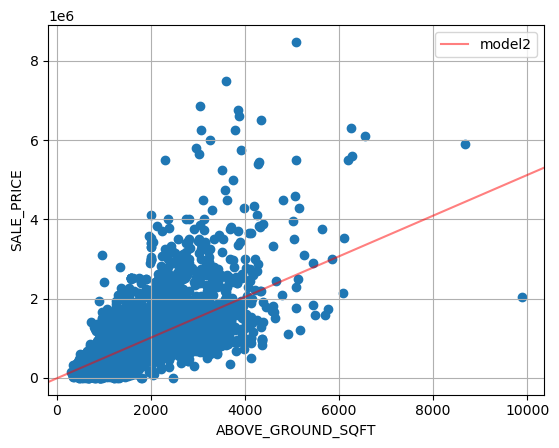

In [24]:
# Fit the regression model
model2 = sm.formula.ols('SALE_PRICE ~ ABOVE_GROUND_SQFT', data=bou).fit()
print(model2.summary())


fig, ax = plt.subplots()
ax.scatter(bou['ABOVE_GROUND_SQFT'], bou['SALE_PRICE'])
sm.graphics.abline_plot(model_results=model2, ax=ax, alpha=0.5, label="model2", color='red')
ax.legend()
ax.set_xlabel("ABOVE_GROUND_SQFT")
ax.set_ylabel("SALE_PRICE")
ax.grid(True)
plt.show()



                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     2255.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:11   Log-Likelihood:                -80638.
No. Observations:                5489   AIC:                         1.613e+05
Df Residuals:                    5487   BIC:                         1.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.761e+04    1.9e+04      2.507      0.0

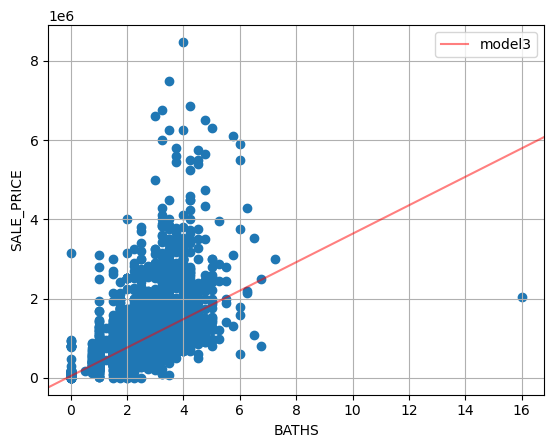

In [25]:
model3 = sm.formula.ols('SALE_PRICE ~ BATHS', data=bou).fit()
print(model3.summary())

fig, ax = plt.subplots()
ax.scatter(bou['BATHS'], bou['SALE_PRICE'])
sm.graphics.abline_plot(model_results=model3, ax=ax, alpha=0.5, label="model3", color='red')
ax.legend()
ax.set_xlabel("BATHS")
ax.set_ylabel("SALE_PRICE")
ax.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     2255.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:11   Log-Likelihood:                -80638.
No. Observations:                5489   AIC:                         1.613e+05
Df Residuals:                    5487   BIC:                         1.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.761e+04    1.9e+04      2.507      0.0

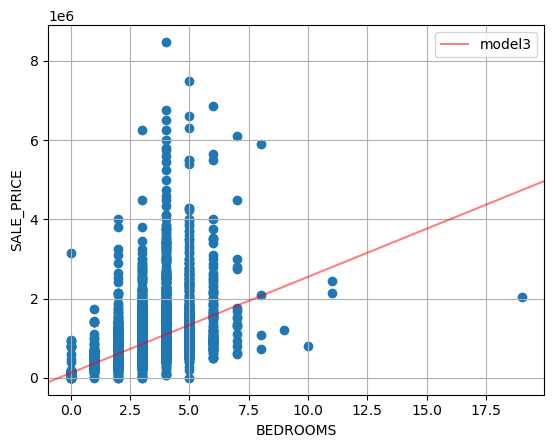

In [26]:
modelbed = sm.formula.ols('SALE_PRICE ~ BEDROOMS', data=bou).fit()
print(model3.summary())

fig, ax = plt.subplots()
ax.scatter(bou['BEDROOMS'], bou['SALE_PRICE'])
sm.graphics.abline_plot(model_results=modelbed, ax=ax, alpha=0.5, label="model3", color='red')
ax.legend()
ax.set_xlabel("BEDROOMS")
ax.set_ylabel("SALE_PRICE")
ax.grid(True)
plt.show()

In [27]:
model2 = sm.formula.ols('SALE_PRICE ~ ABOVE_GROUND_SQFT + BATHS', data=bou).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:11   Log-Likelihood:                -80208.
No. Observations:                5489   AIC:                         1.604e+05
Df Residuals:                    5486   BIC:                         1.604e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8.935e+04   1.81e+0

In [28]:
model2 = sm.formula.ols('SALE_PRICE ~ ABOVE_GROUND_SQFT + BATHS + BEDROOMS + GARAGE_SQFT + LAND_VALUE', data=bou).fit()
print(model2.summary())

#check for correlation between variables, if it is over 0.3 you need to drop either one

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2187.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:11   Log-Likelihood:                -78573.
No. Observations:                5489   AIC:                         1.572e+05
Df Residuals:                    5483   BIC:                         1.572e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.841e+04   1.44e+0

In [29]:
#search for collinearity

cols = ['ABOVE_GROUND_SQFT', 'BATHS', 'BEDROOMS', 'GARAGE_SQFT', 'LAND_VALUE', 'SALE_PRICE']

# Create a new DataFrame with only these columns
df = bou[cols]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

                   ABOVE_GROUND_SQFT     BATHS  BEDROOMS  GARAGE_SQFT  \
ABOVE_GROUND_SQFT           1.000000  0.749581  0.638689     0.641458   
BATHS                       0.749581  1.000000  0.779513     0.601506   
BEDROOMS                    0.638689  0.779513  1.000000     0.573076   
GARAGE_SQFT                 0.641458  0.601506  0.573076     1.000000   
LAND_VALUE                  0.376876  0.316344  0.379561     0.253722   
SALE_PRICE                  0.616645  0.539652  0.463656     0.420584   

                   LAND_VALUE  SALE_PRICE  
ABOVE_GROUND_SQFT    0.376876    0.616645  
BATHS                0.316344    0.539652  
BEDROOMS             0.379561    0.463656  
GARAGE_SQFT          0.253722    0.420584  
LAND_VALUE           1.000000    0.715029  
SALE_PRICE           0.715029    1.000000  


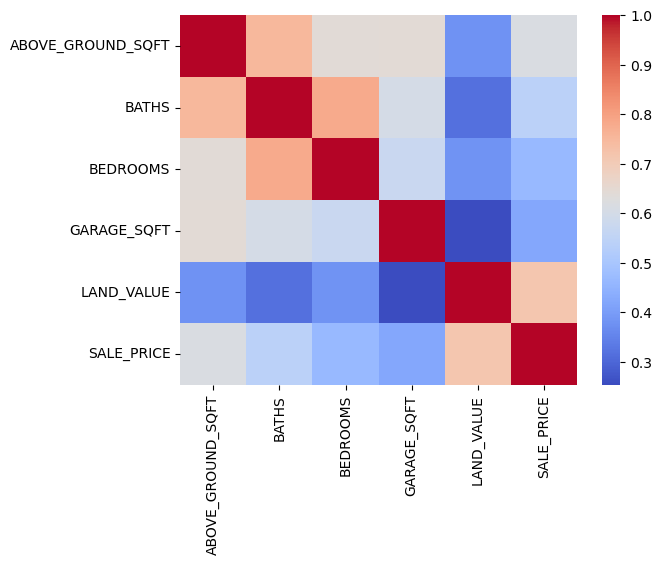

In [30]:


# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Show the plot
plt.show()

In [31]:
model2 = sm.formula.ols('SALE_PRICE ~ ABOVE_GROUND_SQFT + LAND_VALUE', data=bou).fit()
print(model2.summary())

#check for correlation between variables, if it is over 0.3 you need to drop either one

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     5133.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:12   Log-Likelihood:                -78688.
No. Observations:                5489   AIC:                         1.574e+05
Df Residuals:                    5486   BIC:                         1.574e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.031e+04   1.26e+0

In [32]:
# Read all sheets of the Excel file into a dictionary of DataFrames with sheet name as keys
sheets_dict = {sheet_name: pd.read_excel('Names.ethnicity.xlsx', sheet_name=sheet_name) 
               for sheet_name in pd.read_excel('Names.ethnicity.xlsx', sheet_name=None)}

# Loop through each sheet name and corresponding DataFrame
for sheet_name, sheet_df in sheets_dict.items():
    print(f"DataFrame name: {sheet_name}")
    globals()[sheet_name] = sheet_df

# Now you can access each DataFrame using its sheet name as the variable name
for sheet_name, sheet_df in sheets_dict.items():
    print(f"DataFrame name: {sheet_name}")
    print(sheet_df.head())  # Print first 5 rows of the DataFrame    
    


    


DataFrame name: Key
DataFrame name: White
DataFrame name: Hispanic
DataFrame name: Native
DataFrame name: Black
DataFrame name: Asian
DataFrame name: 2more
DataFrame name: Key
                                          Unnamed: 0
0  1. This is the total number of occurrences for...
1  2. This is the total number of people who self...
2  3. This is the percentage of people who self-i...
3  4. This is our unofficial rank of the last nam...
4  5. This is the official U.S. rank of the last ...
DataFrame name: White
  Last Name/Surname    Total    White  whitepercentage  whiterank  USRank
0             SMITH  2442977  1732071           0.7090          1       1
1           JOHNSON  1932812  1139779           0.5897          2       2
2            MILLER  1161437   976885           0.8411          3       7
3             BROWN  1437026   832757           0.5795          4       4
4             JONES  1425470   786717           0.5519          5       5
DataFrame name: Hispanic
  Last Name/Sur

In [33]:
# Read all sheets of the Excel file into a dictionary of DataFrames with sheet name as keys
sheets_dict = pd.read_excel('Names.ethnicity.xlsx', sheet_name=None)

# Merge all DataFrames on the "USRank" column
merged_df = pd.concat(sheets_dict.values()).groupby('USRank').first().reset_index()

# Select only certain columns
selected_cols = ['Last Name/Surname','USRank', 'Total', 'whitepercentage', 'hispanicpercentage', 'blackpercentage', 'asianpercentage', '2morepercentage', 'nativepercentage']
merged_df = merged_df.loc[:, selected_cols]

# Print the merged DataFrame
print(merged_df.head())

  Last Name/Surname  USRank      Total  whitepercentage  hispanicpercentage  \
0             SMITH     1.0  2442977.0           0.7090              0.0240   
1           JOHNSON     2.0  1932812.0           0.5897              0.0236   
2          WILLIAMS     3.0  1625252.0           0.4575              0.0249   
3             BROWN     4.0  1437026.0           0.5795              0.0252   
4             JONES     5.0  1425470.0           0.5519              0.0229   

   blackpercentage  asianpercentage  2morepercentage  nativepercentage  
0           0.2311           0.0050           0.0219            0.0089  
1           0.3463           0.0054           0.0256            0.0094  
2           0.4768           0.0046           0.0281            0.0082  
3           0.3560           0.0051           0.0255            0.0087  
4           0.3848           0.0044           0.0261            0.0100  


In [34]:
#change al NaN for zeros
merged_df.fillna(0, inplace=True)

In [35]:
merged_df['race'] = ''

merged_df.loc[merged_df['asianpercentage'] > merged_df[['whitepercentage', 'hispanicpercentage', 'blackpercentage', '2morepercentage', 'nativepercentage']].max(axis=1), 'race'] = 'asian'
merged_df.loc[merged_df['blackpercentage'] > merged_df[['whitepercentage', 'hispanicpercentage', 'asianpercentage', '2morepercentage', 'nativepercentage']].max(axis=1), 'race'] = 'black'
merged_df.loc[merged_df['whitepercentage'] > merged_df[['asianpercentage', 'hispanicpercentage', 'blackpercentage', '2morepercentage', 'nativepercentage']].max(axis=1), 'race'] = 'white'
merged_df.loc[merged_df['nativepercentage'] > merged_df[['whitepercentage', 'hispanicpercentage', 'blackpercentage', '2morepercentage', 'asianpercentage']].max(axis=1), 'race'] = 'native'
merged_df.loc[merged_df['2morepercentage'] > merged_df[['whitepercentage', 'hispanicpercentage', 'blackpercentage', 'asianpercentage', 'nativepercentage']].max(axis=1), 'race'] = '2more'
merged_df.loc[merged_df['hispanicpercentage'] > merged_df[['whitepercentage', 'asianpercentage', 'blackpercentage', '2morepercentage', 'nativepercentage']].max(axis=1), 'race'] = 'hispanic'

print(merged_df.head())

  Last Name/Surname  USRank      Total  whitepercentage  hispanicpercentage  \
0             SMITH     1.0  2442977.0           0.7090              0.0240   
1           JOHNSON     2.0  1932812.0           0.5897              0.0236   
2          WILLIAMS     3.0  1625252.0           0.4575              0.0249   
3             BROWN     4.0  1437026.0           0.5795              0.0252   
4             JONES     5.0  1425470.0           0.5519              0.0229   

   blackpercentage  asianpercentage  2morepercentage  nativepercentage   race  
0           0.2311           0.0050           0.0219            0.0089  white  
1           0.3463           0.0054           0.0256            0.0094  white  
2           0.4768           0.0046           0.0281            0.0082  black  
3           0.3560           0.0051           0.0255            0.0087  white  
4           0.3848           0.0044           0.0261            0.0100  white  


In [36]:
merged_df.to_csv('Names.ethnicity.merged.csv', index=False)
namematrix =merged_df
print(namematrix.head())

  Last Name/Surname  USRank      Total  whitepercentage  hispanicpercentage  \
0             SMITH     1.0  2442977.0           0.7090              0.0240   
1           JOHNSON     2.0  1932812.0           0.5897              0.0236   
2          WILLIAMS     3.0  1625252.0           0.4575              0.0249   
3             BROWN     4.0  1437026.0           0.5795              0.0252   
4             JONES     5.0  1425470.0           0.5519              0.0229   

   blackpercentage  asianpercentage  2morepercentage  nativepercentage   race  
0           0.2311           0.0050           0.0219            0.0089  white  
1           0.3463           0.0054           0.0256            0.0094  white  
2           0.4768           0.0046           0.0281            0.0082  black  
3           0.3560           0.0051           0.0255            0.0087  white  
4           0.3848           0.0044           0.0261            0.0100  white  


In [37]:
#debug
#bou.to_csv('Bou.csv', index=False)

In [38]:
bou['grantorfirst'] = bou['grantor'].str.split().str[0]
bou['granteefirst'] = bou['grantee'].str.split().str[0]

C:\Users\dgard\AppData\Local\Temp\ipykernel_8508\1167348072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bou['grantorfirst'] = bou['grantor'].str.split().str[0]
C:\Users\dgard\AppData\Local\Temp\ipykernel_8508\1167348072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bou['granteefirst'] = bou['grantee'].str.split().str[0]


In [39]:
#grantor first
# Merge bou and namematrix dataframes using the common column
merged_df = bou.merge(namematrix, how='left', left_on='grantorfirst', right_on='Last Name/Surname')

# Create dummy variables for the race column
race_dummies = pd.get_dummies(merged_df['race'], prefix='tor')

# Join the dummy variable dataframe with the original bou dataframe
bou = bou.join(race_dummies)

In [40]:
#grantee now
# Merge bou and namematrix dataframes using the common column
merged_df = bou.merge(namematrix, how='left', left_on='granteefirst', right_on='Last Name/Surname')

# Create dummy variables for the race column
race_dummies = pd.get_dummies(merged_df['race'], prefix='tee')

# Join the dummy variable dataframe with the original bou dataframe
bou = bou.join(race_dummies)

In [41]:
torlist = [col for col in bou.columns if col.startswith('tor_')]
teelist = [col for col in bou.columns if col.startswith('tee_')]
print(torlist)
print(teelist)
racelist=torlist+teelist
print(racelist)

racelistmod=['tor_asian', 'tor_black', 'tor_hispanic', 'tor_native', 'tor_white', 'tee_asian', 'tee_black', 'tee_hispanic', 'tee_native', 'tee_white']
print(racelistmod)

['tor_2more', 'tor_asian', 'tor_black', 'tor_hispanic', 'tor_native', 'tor_white']
['tee_2more', 'tee_asian', 'tee_black', 'tee_hispanic', 'tee_native', 'tee_white']
['tor_2more', 'tor_asian', 'tor_black', 'tor_hispanic', 'tor_native', 'tor_white', 'tee_2more', 'tee_asian', 'tee_black', 'tee_hispanic', 'tee_native', 'tee_white']
['tor_asian', 'tor_black', 'tor_hispanic', 'tor_native', 'tor_white', 'tee_asian', 'tee_black', 'tee_hispanic', 'tee_native', 'tee_white']


In [42]:
bou.to_csv('Bou.csv', index=False)

In [43]:
#PRICE_SQFT
#SALE_PRICE
formula = 'PRICE_SQFT ~ ' + ' + '.join(racelistmod)
print(formula)

# Fit the regression model
model = sm.formula.ols(formula=formula, data=bou).fit()

# Print the model summary
print(model.summary())

PRICE_SQFT ~ tor_asian + tor_black + tor_hispanic + tor_native + tor_white + tee_asian + tee_black + tee_hispanic + tee_native + tee_white
                            OLS Regression Results                            
Dep. Variable:             PRICE_SQFT   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.067
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           5.36e-15
Time:                        23:07:28   Log-Likelihood:                -37205.
No. Observations:                5488   AIC:                         7.443e+04
Df Residuals:                    5477   BIC:                         7.450e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025   

In [44]:
#search for collinearity

#cols = ['ABOVE_GROUND_SQFT', 'BATHS', 'BEDROOMS', 'GARAGE_SQFT', 'LAND_VALUE', 'SALE_PRICE']

# Create a new DataFrame with only these columns
df = bou[racelistmod]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

              tor_asian  tor_black  tor_hispanic  tor_native  tor_white  \
tor_asian      1.000000  -0.020691     -0.028936   -0.005938  -0.103675   
tor_black     -0.020691   1.000000     -0.030996   -0.006361  -0.111054   
tor_hispanic  -0.028936  -0.030996      1.000000   -0.008895  -0.155304   
tor_native    -0.005938  -0.006361     -0.008895    1.000000  -0.031871   
tor_white     -0.103675  -0.111054     -0.155304   -0.031871   1.000000   
tee_asian      0.025460  -0.014170     -0.029037   -0.008025  -0.016459   
tee_black      0.002883   0.049248     -0.012733   -0.005548  -0.004565   
tee_hispanic  -0.001738  -0.001156      0.184227   -0.010859  -0.001672   
tee_native    -0.005310  -0.005688      0.015979   -0.001632   0.001395   
tee_white      0.000314  -0.014208     -0.036332    0.002304   0.018384   

              tee_asian  tee_black  tee_hispanic  tee_native  tee_white  
tor_asian      0.025460   0.002883     -0.001738   -0.005310   0.000314  
tor_black     -0.014170   

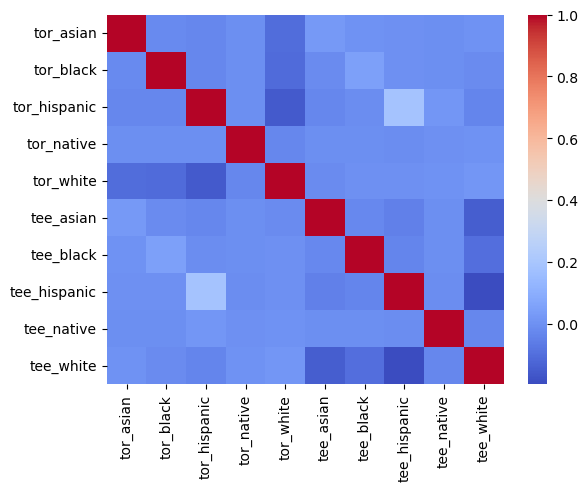

In [45]:
# Create a new DataFrame with only the columns of interest
df = bou[racelistmod]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Show the plot
plt.show()

In [46]:
# Extract unique values from 'MARKET_AREA' column
#unique_market_areas = bou['MARKET_AREA'].unique()
bou['MARKET_AREA'] = bou['MARKET_AREA'].astype(int)
unique_market_areas = bou['MARKET_AREA'].unique()

# Create dummy variables for the values
dummiesma = pd.get_dummies(bou['MARKET_AREA'], prefix='ma')


# Concatenate the dummy variables with the original dataframe
bou = bou.join(dummiesma)

In [47]:
#print(unique_market_areas)

#market_areas_list = list(map(str, unique_market_areas))
#print(market_areas_list)
print (dummiesma)

      ma_101  ma_102  ma_103  ma_104  ma_105  ma_106  ma_107  ma_108  ma_109  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       1       0       0       0       0   
2          0       0       0       0       1       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5485       0       0       0       0       0       0       0       0       0   
5486       0       0       0       0       0       0       0       0       0   
5487       0       0       0       0       0       0       0       0       0   
5488       0       0       0       0       0       0       0       0       0   
5489       0       0       0       0       0       0       0       0       0   

      ma_201  ...  ma_502  ma_503  ma_5

In [48]:
bou.to_csv('Bou.csv', index=False)

In [49]:
columnma = list(dummiesma.columns)

formula = 'PRICE_SQFT ~ ' + ' + '.join(columnma)
print(formula)

# Fit the regression model
model = sm.formula.ols(formula=formula, data=bou).fit()

# Print the model summary
print(model.summary())

PRICE_SQFT ~ ma_101 + ma_102 + ma_103 + ma_104 + ma_105 + ma_106 + ma_107 + ma_108 + ma_109 + ma_201 + ma_202 + ma_301 + ma_302 + ma_303 + ma_304 + ma_401 + ma_402 + ma_403 + ma_404 + ma_405 + ma_407 + ma_501 + ma_502 + ma_503 + ma_505 + ma_506 + ma_507 + ma_630 + ma_632 + ma_633 + ma_634 + ma_699
                            OLS Regression Results                            
Dep. Variable:             PRICE_SQFT   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:07:29   Log-Likelihood:                -35103.
No. Observations:                5489   AIC:                         7.027e+04
Df Residuals:                    5457   BIC:                         7.048e+04
Df Model:                          31                                

In [50]:
formula2= columnma + racelistmod
print(formula2)

formula = 'PRICE_SQFT ~ ABOVE_GROUND_SQFT +' + ' + '.join(formula2)
#formula = 'PRICE_SQFT ~ ' + ' + '.join(columnma) + ' + ' + ' + '.join(racelistmod)
print(formula)

# Fit the regression model
model = sm.formula.ols(formula=formula, data=bou).fit()

# Print the model summary
print(model.summary())

['ma_101', 'ma_102', 'ma_103', 'ma_104', 'ma_105', 'ma_106', 'ma_107', 'ma_108', 'ma_109', 'ma_201', 'ma_202', 'ma_301', 'ma_302', 'ma_303', 'ma_304', 'ma_401', 'ma_402', 'ma_403', 'ma_404', 'ma_405', 'ma_407', 'ma_501', 'ma_502', 'ma_503', 'ma_505', 'ma_506', 'ma_507', 'ma_630', 'ma_632', 'ma_633', 'ma_634', 'ma_699', 'tor_asian', 'tor_black', 'tor_hispanic', 'tor_native', 'tor_white', 'tee_asian', 'tee_black', 'tee_hispanic', 'tee_native', 'tee_white']
PRICE_SQFT ~ ABOVE_GROUND_SQFT +ma_101 + ma_102 + ma_103 + ma_104 + ma_105 + ma_106 + ma_107 + ma_108 + ma_109 + ma_201 + ma_202 + ma_301 + ma_302 + ma_303 + ma_304 + ma_401 + ma_402 + ma_403 + ma_404 + ma_405 + ma_407 + ma_501 + ma_502 + ma_503 + ma_505 + ma_506 + ma_507 + ma_630 + ma_632 + ma_633 + ma_634 + ma_699 + tor_asian + tor_black + tor_hispanic + tor_native + tor_white + tee_asian + tee_black + tee_hispanic + tee_native + tee_white
                            OLS Regression Results                            
Dep. Variable:  

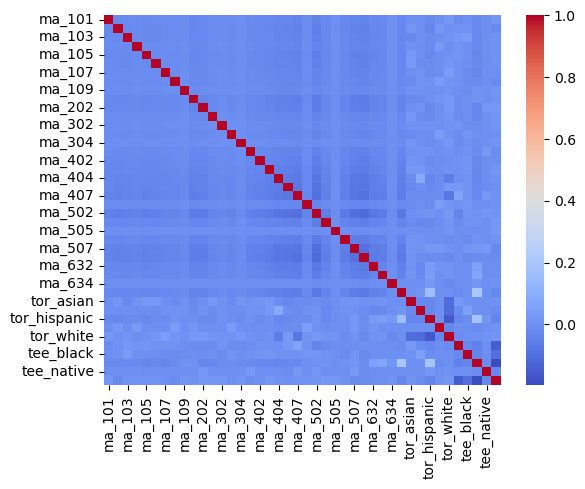

In [51]:
# Create a new DataFrame with only the columns of interest
df = bou[formula2]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Show the plot
plt.show()

In [52]:
import gensim

st_names = []
for i in range(len(bandj)):
    st_name = gensim.utils.simple_preprocess(bandj.iloc[i]["ADDRESS_NAME"])
    st_names.append(st_name)
print(len(st_names))
print(st_names)

8861
[['riverside'], ['morgan'], ['stonewall'], ['macedonia'], ['petursdale'], ['niwot', 'hills'], ['tulip'], ['spencer'], ['arapahoe'], ['moorhead'], ['williams', 'fork'], ['tenacity'], ['whitney'], ['whitney'], ['lee'], ['noble'], ['idalia'], ['hyacinth'], ['cleveland'], ['club'], ['shortridge'], ['furrow'], ['niwot', 'square'], ['daylilly'], ['smith'], ['th'], ['corona'], ['th'], ['siena'], ['niwot'], ['gooseberry'], ['th'], ['juniper'], ['th'], ['gallatin'], ['jefferson'], ['pope'], ['baseline'], ['senecio'], ['cherrywood'], ['th'], ['sundown'], ['broadway'], ['paonia'], ['sugarloaf'], ['mesa'], ['james'], ['mountain', 'view'], ['linden'], ['mccall'], ['th'], ['canyon'], ['arapahoe'], ['th'], ['university', 'heights'], ['indiana', 'gulch'], ['st', 'vrain'], ['ravenwood'], ['wicklow'], ['white', 'hawk', 'ranch'], ['laramie'], ['baron'], [], ['pheasant'], ['milo'], ['terry'], ['longs', 'peak'], ['francis'], ['turin'], ['ponderosa'], ['crestone'], ['maggie'], ['glenarbor'], ['spruce']

In [53]:
model = gensim.models.Word2Vec(st_names, vector_size = 300, min_count=1, workers=4)
print(model)

Word2Vec(vocab=1535, vector_size=300, alpha=0.025)


In [54]:
vocab = list(model.wv.index_to_key)
print(len(vocab))
print(vocab)

1535
['th', 'rd', 'st', 'nd', 'creek', 'rock', 'chase', 'ridge', 'allison', 'garrison', 'peak', 'mountain', 'collyer', 'everett', 'carr', 'nelson', 'hawk', 'ingalls', 'valmont', 'canyon', 'south', 'boulder', 'arapahoe', 'iris', 'meadowlark', 'independence', 'white', 'summer', 'oak', 'high', 'estes', 'quail', 'dover', 'baseline', 'brentwood', 'balsam', 'view', 'flower', 'walnut', 'yarrow', 'gray', 'pearl', 'vivian', 'harlan', 'fork', 'depew', 'hill', 'pierson', 'winding', 'broadway', 'fenton', 'field', 'flats', 'newland', 'reed', 'lincoln', 'ames', 'greenville', 'point', 'gordon', 'marshall', 'spruce', 'holland', 'marfell', 'drake', 'wildrose', 'otis', 'lamar', 'cody', 'lee', 'dudley', 'red', 'pierce', 'north', 'pine', 'wright', 'western', 'rosevine', 'lake', 'holman', 'jay', 'parfet', 'grant', 'promenade', 'taft', 'lewis', 'folsom', 'kendall', 'old', 'benton', 'hills', 'butte', 'meadow', 'simms', 'garland', 'gay', 'judson', 'miller', 'quay', 'shadow', 'oneal', 'juniper', 'blue', 'olymp

In [60]:
model.wv.most_similar('river', topn = 10)

[('measures', 0.22406107187271118),
 ('stones', 0.20527182519435883),
 ('collyer', 0.19133245944976807),
 ('forge', 0.18314549326896667),
 ('emerson', 0.17596237361431122),
 ('glade', 0.17267005145549774),
 ('ann', 0.17095468938350677),
 ('heights', 0.15985186398029327),
 ('quiet', 0.155644953250885),
 ('billington', 0.15153875946998596)]

In [74]:
# Find the top 10 most similar words to 'rock'
similar_words = model.wv.most_similar('rock', topn=10)

# Create a Pandas DataFrame with the similar words
similar_words_df = pd.DataFrame(similar_words, columns=['Word', 'Similarity'])
# Drop the 'Similarity' column
similar_words_df = similar_words_df.drop('Similarity', axis=1)

# Print the DataFrame
print(similar_words_df)

        Word
0     summer
1      creek
2    rainbow
3  firestone
4     ludlow
5      south
6    flowers
7     canyon
8  paramount
9   marigold


In [61]:
model.wv.most_similar('mountain', topn = 10)

[('queen', 0.23277224600315094),
 ('newcombe', 0.18934611976146698),
 ('ramona', 0.17787699401378632),
 ('french', 0.1670970916748047),
 ('flora', 0.1658516377210617),
 ('beech', 0.16303303837776184),
 ('kenyon', 0.15882830321788788),
 ('eldora', 0.15413397550582886),
 ('london', 0.1523626297712326),
 ('la', 0.15001215040683746)]

In [66]:
# Create a dummy variable "NATURE_YES" if "ADDRESS_NAME" contains one of the words in "similar_words_df"
bandj['NATURE_YES'] = bandj['ADDRESS_NAME'].apply(lambda x: 1 if any(word.lower() in x.lower() for word in similar_words_df['Word']) else 0)

# Print the updated DataFrame
print(bandj)
#bandj.to_csv('nature.csv', index=False)

      Unnamed: 0  MARKET_AREA      PROPERTY_ADDRESS         LOCCITY  \
0            0.0        201.0   2637 RIVERSIDE DR    UNINCORPORATED   
1            1.0        105.0       935 MORGAN DR           BOULDER   
2            2.0        105.0   5584 STONEWALL PL           BOULDER   
3            3.0        303.0  10350 MACEDONIA ST    UNINCORPORATED   
4            4.0        401.0  7146 PETURSDALE CT    UNINCORPORATED   
...          ...          ...                   ...             ...   
3505         NaN          NaN          3350  OAK ST             NaN   
3506         NaN          NaN       2822  TELLER ST             NaN   
3507         NaN          NaN        8855 W 32ND PL             NaN   
3508         NaN          NaN        4020  ESTES ST             NaN   
3509         NaN          NaN        3885  URBAN ST             NaN   

                                  SUBNAME     BLDG1_DESIGN  BLDG1_YEAR_BUILT  \
0                     HEATHERMEADE 4 - MT  1 Story - Ranch         

In [65]:
print(similar_words_df)

        Word
0     summer
1      creek
2    rainbow
3  firestone
4     ludlow
5      south
6    flowers
7     canyon
8  paramount
9   marigold


In [72]:
# Fit the regression model
modeln111 = sm.formula.ols('PRICE_SQFT ~ HAS_NUMBERS + HAS_13 + NATURE_YES', data=bandj).fit()
print(modeln111.summary())

                            OLS Regression Results                            
Dep. Variable:             PRICE_SQFT   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.087
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           0.000392
Time:                        23:43:49   Log-Likelihood:                -59317.
No. Observations:                8861   AIC:                         1.186e+05
Df Residuals:                    8857   BIC:                         1.187e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     389.5606      2.418    161.116      